<a href="https://colab.research.google.com/github/joao-1988/linear_merror_regular/blob/main/Lasso_com_Erro_de_Medida.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
---

<h1><center><b>
RELATÓRIO DO ARTIGO "MEASUREMENT ERROR IN LASSO: IMPACT AND LIKELIHOOD BIAS CORRECTION"
</b></center></h1>

**Disciplina:** Inferência Avançada

**Aluno:**
* João Flávio Andrade Silva

**Data de entrega**: 30/06/2022
---
---

# LASSO COM ERRO DE MEDIDA: IMPACTO E CORREÇÃO DE VIÉS DE PROBABILIDADE

**Resumo e Introdução**

A regressão com a penalidade de lasso é uma ferramenta popular para realizar a redução de dimensão quando o número de covariáveis ​​é grande.

O artigo Measurement error in LASSO: Impact and likelihood bias correction [1] aborda o impacto do erro de medição na regressão linear com a penalidade do lasso, tanto analiticamente quanto em experimentos de simulação.  Considera um método simples de correção para erro de medida no lasso. E mostra que no limite, o lasso corrigido produz uma seleção de covariáveis ​​consistente de sinal sob condições muito semelhantes ao lasso com medidas perfeitas, enquanto o lasso não corrigido requer condições muito mais rigorosas na estrutura de covariância dos dados.

# Regressão Linear

* Função de perda $$L(y,f(x))$$

  * Utilizando função de perda quadrática, temos
  $$L(y,f(x)) = \frac{1}{n} \sum_{i=1}^{n} (y_i - f(x_i))^2 $$
  * Para função $f(x)$ linear temos $f(x) = \beta_0 + \sum_{j=1}^{d} x_j$ e assim
  $$L(y,f(x) ) = \frac{1}{n} \sum_{i=1}^{n} (y_i - \beta_0 + \sum_{j=1}^{d} \beta_j x_{i,j} )^2 $$

* Derivadas parciais da função de perda em relação aos parâmetros de interesse, no caso linear é o $\beta$

  * $ \frac{\partial L(y,f(x) )}{\partial \beta_0} = \frac{-2}{n} \sum_{i=1}^{n} (y_i - \beta_0) $
  * $\frac{\partial L(y,f(x) )}{\partial \beta_j} = \frac{-2}{n} \sum_{i=1}^{n}  (y_i - \beta_j x_{i,j})
x_{i,j}, ∀ j > 0 $

* Atualização das estimativas dos parâmetros

  * $ \hat \beta_0^{k}  = \hat \beta_0^{k-1} - \frac{\partial L(y,\hat f(x)^{k-1})}{\partial \hat \beta_0^{k-1}} $
  * $ \hat \beta_j^{k}  = \hat \beta_j^{k-1} - \frac{\partial L(y,\hat f(x)^{k-1})}{\partial \hat \beta_j^{k-1}}
, ∀ j > 0 $

Perceba que ao se aproximar do valor ótimo as derivadas parciais se aproximam de zero. 

Para compreender melhor, tomemos um caso bem simples: $\beta x = \beta_0$. Dessa forma, temos
$$ \frac{\partial L(y,f(x) )}{\partial \beta_0} = \frac{-2}{n} \sum_{i=1}^{n} (y_i - \beta_0)$$ 
sabemos que o número de $\beta_0$ que minimiza a função de perda é o número que a derivada parcial é zero
$$\frac{-2}{n} \sum_{i=1}^{n} (y_i - \beta_0) = 0 $$
$$ \beta_0-\bar y = 0 $$

observe que $\bar y$ é sempre fixo, então se a diferença $\beta_0-\bar y$ é positiva, então é intuitivo reduzir o valor de $\beta_0$ para aproximarmos de zero, e quando a diferença for negativa aumentar o valor de $\beta_0$.

Em $ \beta_0-\bar y = 0 $, você deve ter percebido que o $\beta_0$ ótimo deve ser igual a $\bar y$, mas isto é devido que no caso de função linear sobre o risco quadrátrico existe solução analítica, entrentanto, o método do gradiente descentende é generalista para funções não lineares e riscos diferente do quadrático - a função deve possuir derivadas parciais de primeira ordem.

Gradiente descendente: a idéia é atingir um mínimo local de uma função, mas veja que escolhendo uma função que o mínimo local seja único então este será também mínimo global. Exemplos de funções em que mínimo local também é global são as funções convexas como: funções quadráticas e o inverso da verossimilhança (log-verossimilhança).

# Regressão Lasso


* Função de perda $$L(y,f(x))$$

  * Lasso: Função Linear sob risco quadrático com penalização norma $\ell_1$
  
  $$L(y,f(x) ) = \frac{1}{2n} \sum_{i=1}^{n} (y_i - \beta_0 + \sum_{j=1}^{d} \beta_j x_{i,j})^2 + \lambda \sum_{j=1}^{d} \vert \beta_j \vert $$

* Derivadas parciais da função de perda em relação aos parâmetros de interesse

  * $ \frac{\partial L(y,f(x) )}{\partial \beta_0} = \frac{-1}{n} \sum_{i=1}^{n} (y_i - \beta_0) $

  * Se $\beta_j > 0 $
    * $\frac{\partial L(y,f(x) )}{\partial \beta_j} = \frac{-1}{n} \sum_{i=1}^{n}  (y_i - \beta_j x_{i,j})  
x_{i,j} + \lambda , ∀ j > 0 $

  * Se $\beta_j <= 0 $
    * $\frac{\partial L(y,f(x) )}{\partial \beta_j} = \frac{-1}{n} \sum_{i=1}^{n}  (y_i - \beta_j x_{i,j})  
x_{i,j} - \lambda, ∀ j > 0 $

* Atualização das estimativas dos parâmetros

  * $ \hat \beta_0^{k}  = \hat \beta_0^{k-1} - \frac{\partial L(y,\hat f(x)^{k-1})}{\partial \hat \beta_0^{k-1}} $
  * $ \hat \beta_j^{k}  = \hat \beta_j^{k-1} - \frac{\partial L(y,\hat f(x)^{k-1})}{\partial \hat \beta_j^{k-1}}
, ∀ j > 0 $


# Regressão Lasso com erro de medida nas covariáveis 




## Modelo de regressão linear com erro de medida (notação matricial)

$$ \mathbf y = \mathbf X  \beta^0 + \epsilon \;\;\; \textrm{e} \;\;\; \mathbf W = \mathbf X + \mathbf U $$

com observações de $d$ covariáveis e variável resposta $ \mathbf y \in \mathbb R^n$ de $n$ indivíduos. A matriz de covariáveis $\mathbf X$ não é observada, ao invés observamos medições com ruído $\mathbf W$. Assumimos a matriz de erros de medida $\mathbf U \in \mathbb R^{n \times d}$ com distribuição normal nas linhas com média zero e covariância $\Sigma_{uu}$. Os erros do modelo $\epsilon = (\epsilon_1, \dots, \epsilon_n)^t$ são i.i.d. normalmente distirbuídos com média zero e variância $\sigma^2$.

## Modelo Linear Lasso

Aqui apresentamos o modelo linear Lasso sem ajuste para o problema de erro de medida, neste caso, este é chamado de *naive approach* (abordagem ingênua). 

  $$\hat \beta(\lambda) = \arg \min_{\beta} \frac{1}{n} \vert\!\vert \mathbf y - \mathbf W\beta \vert\!\vert_2^2 + \lambda \vert\!\vert \beta \vert\!\vert_1 $$

  $$ = \arg \min_{\beta} \frac{1}{n} \sum_{i=1}^{n} (y_i - \beta_0 + \sum_{j=1}^{d} \beta_j w_{i,j})^2 + \lambda \sum_{j=1}^{d} \vert \beta_j \vert $$

em que $\lambda > 0 $ é um parâmetro de regularização.



## Modelo Linear Lasso - Correção para Erro de Medida 

Aqui consideramos o modelo Lasso corrigido. A correção utilizada é motivada pelo fato da função de perda do *naive* Lasso ser viesada:
$$ E[ \vert\!\vert \mathbf y - \mathbf W\beta \vert\!\vert_2^2 \vert \mathbf X , \mathbf y ] = \vert\!\vert \mathbf y - \mathbf X \beta \vert\!\vert_2^2 \vert + n\beta^t\Sigma_{uu}\beta $$

Isto sugere regularização Lasso corrigido (regularized corrected Lasso - RCL),  

 $$\hat \beta_{RCL} = \arg \min_{\beta} \frac{1}{n} \vert\!\vert \mathbf y - \mathbf W\beta \vert\!\vert_2^2 - \beta^t\Sigma_{uu}\beta + \lambda \vert\!\vert \beta \vert\!\vert_1 $$

introduzida por Loh and Wainwright (2012). 



### Implementação do algorítmo 

Nesta implementação do algorítmo de estimação dos parâmetros do modelo Linear Lasso com Correção para Erro de Medida adicionalmente supomos erros de medida independentes e com variância constante, isto é, $\Sigma_{uu} = \sigma_u^2Ι_d$.

Logo o modelo fica resumido a 

$$\hat \beta_{RCL} = \arg \min_{\beta} \frac{1}{n} \vert\!\vert \mathbf y - \mathbf W\beta \vert\!\vert_2^2 - \beta^t\sigma_u^2Ι_d\beta + \lambda \vert\!\vert \beta \vert\!\vert_1 $$

e nossa função de perda pode ser reescrita na forma
 
$$ L(y,f(w) )  = \frac{1}{n} \sum_{i=1}^{n} (y_i - \beta_0 + \sum_{j=1}^{d} \beta_j w_{i,j})^2 - \sigma_u^2 \sum_{j=1}^{d}  \beta_j^2 + \lambda \sum_{j=1}^{d} \vert \beta_j \vert $$

Temos as Derivadas parciais da função de perda em relação aos parâmetros de interesse

  * $ \frac{\partial L(y,f(w) )}{\partial \beta_0} = \frac{-2}{n} \sum_{i=1}^{n} (y_i - \beta_0) $

  * Se $\beta_j > 0 $
    * $\frac{\partial L(y,f(w) )}{\partial \beta_j} = \frac{-2}{n} \sum_{i=1}^{n}  (y_i - \beta_j w_{i,j})  
w_{i,j} - 2\sigma_u^2\beta_j + \lambda , ∀ j > 0 $

  * Se $\beta_j <= 0 $
    * $\frac{\partial L(y,f(w) )}{\partial \beta_j} = \frac{-2}{n} \sum_{i=1}^{n}  (y_i - \beta_j w_{i,j})  
w_{i,j} - 2\sigma_u^2\beta_j - \lambda , ∀ j > 0 $

* Atualização das estimativas dos parâmetros

  * $ \hat \beta_0^{k}  = \hat \beta_0^{k-1} - \frac{\partial L(y,\hat f(x)^{k-1})}{\partial \hat \beta_0^{k-1}} $
  * $ \hat \beta_j^{k}  = \hat \beta_j^{k-1} - \frac{\partial L(y,\hat f(x)^{k-1})}{\partial \hat \beta_j^{k-1}}
, ∀ j > 0 $
  

# Regressão Elastic Net


* Função de perda $$L(y,f(x))$$

  * Lasso: Função Linear sob risco quadrático com penalização norma $\ell_2$ e $\ell_1$
  
  $$L(y,f(x) ) = \frac{1}{2n} \sum_{i=1}^{n} (y_i - \beta_0 + \sum_{j=1}^{d} \beta_j x_{i,j})^2 + \lambda \left(\frac{(1-\alpha)}{2} \sum_{j=1}^{d}  \beta_j^2 + \alpha \sum_{j=1}^{d} \vert \beta_j \vert \right) $$

* Derivadas parciais da função de perda em relação aos parâmetros de interesse

  * $ \frac{\partial L(y,f(x) )}{\partial \beta_0} = \frac{-1}{n} \sum_{i=1}^{n} (y_i - \beta_0) $

  * Se $\beta_j > 0 $
    * $\frac{\partial L(y,f(x) )}{\partial \beta_j} = \frac{-1}{n} \sum_{i=1}^{n}  (y_i - \beta_j x_{i,j})  
x_{i,j} + \lambda (1 - \alpha)\beta_j + \lambda \alpha , ∀ j > 0 $

  * Se $\beta_j <= 0 $
    * $\frac{\partial L(y,f(x) )}{\partial \beta_j} = \frac{-1}{n} \sum_{i=1}^{n}  (y_i - \beta_j x_{i,j})  
x_{i,j} + \lambda (1 - \alpha)\beta_j - \lambda \alpha, ∀ j > 0 $

* Atualização das estimativas dos parâmetros

  * $ \hat \beta_0^{k}  = \hat \beta_0^{k-1} - \frac{\partial L(y,\hat f(x)^{k-1})}{\partial \hat \beta_0^{k-1}} $
  * $ \hat \beta_j^{k}  = \hat \beta_j^{k-1} - \frac{\partial L(y,\hat f(x)^{k-1})}{\partial \hat \beta_j^{k-1}}
, ∀ j > 0 $


# Implementações dos algorítmos 

Para cada um dos modelos descritos anteriormente implementei um algoritmo utilizando linguagem Python (com auxílio apenas do pacote Numpy) e programação orientada objeto, em todos os algorítmos o método de otimização empregado foi o Gradiente Descente.

Objetos criados:
* LinearRegression(): Modelo de Regressão Linear
* Lasso(): Modelo de Regressão Linear Lasso 
* ElasticNet(): Modelo de Regressão Linear Elastic Net
* LassoME(): Modelo de Regressão Linear Lasso com ajuste para Erro de Medida




In [ ]:
class LinearRegression():
  
  def __init__(self,intercept=True, max_iter=1000,tol=0.001,learning_rate=0.1,random_state=None):
    self.intercept = intercept
    self.max_iter = max_iter
    self.tol = tol    
    self.learning_rate = learning_rate
    self.random_state = random_state

  def predict(self,X):
    return self.intercept_ + X.dot(self.coef_) 

  def fit(self,X,y):
    import numpy as np

    np.random.seed(self.random_state)
    self.n_, self.d_ = X.shape
    self.coef_ = np.random.normal(0,1,self.d_)
    self.intercept_ = 0

    # gradiente descendente 
    for i in range(1,self.max_iter+1) : 
      predictions = self.predict(X)    
      d_coef = np.array( [ (-2/self.n_)*(y - predictions).dot(X[:,k]) 
                      for k in range(self.d_) ])
      self.coef_ -= d_coef*self.learning_rate
      if self.intercept == True:
        d_int = (-2/self.n_)*np.sum(y - predictions)
        self.intercept_ -= d_int*self.learning_rate

      c_tol = np.max(np.abs(d_coef*self.learning_rate))/np.max(np.abs(self.coef_))
      if c_tol <= self.tol:         
        self.n_iter_ = i 
        break
    if i == self.max_iter:
      print('Máximo de iterações atingido')  
    return self    

class Lasso():
  
  def __init__(self,intercept=True,Lambda=1,max_iter=1000,tol=0.001,learning_rate=0.1,random_state=None):
    self.intercept = intercept 
    self.Lambda = Lambda
    self.max_iter = max_iter
    self.tol = tol    
    self.learning_rate = learning_rate
    self.random_state = random_state

  def predict(self,X):
    return self.intercept_ + X.dot(self.coef_) 

  def fit(self,X,y):
    import numpy as np

    np.random.seed(self.random_state)
    self.n_, self.d_ = X.shape
    self.coef_ = np.random.normal(0,1,self.d_)
    self.intercept_ = 0

    # gradiente descendente 
    for i in range(1,self.max_iter+1) : 
      predictions = self.predict(X)    
      d_coef = np.array( [ np.where( self.coef_[k] > 0 
                          , (-1/self.n_)*(y - predictions).dot(X[:,k]) + self.Lambda  
                          , (-1/self.n_)*(y - predictions).dot(X[:,k]) - self.Lambda ) 
                      for k in range(self.d_) ])
      self.coef_ -= d_coef*self.learning_rate
      if self.intercept == True:
        d_int = (-1/self.n_)*np.sum(y - predictions)
        self.intercept_ -= d_int*self.learning_rate

      c_tol = np.max(np.abs(d_coef*self.learning_rate))/np.max(np.abs(self.coef_))
      if c_tol <= self.tol:         
        self.n_iter_ = i 
        break
    if i == self.max_iter:
      print('Máximo de iterações atingido')  
    return self        

class ElasticNet():
  
  def __init__(self,intercept=True,Lambda=1,alpha=1,max_iter=1000,tol=0.001,learning_rate=0.1,random_state=None):
    self.intercept = intercept 
    self.Lambda = Lambda
    self.alpha = alpha    
    self.max_iter = max_iter
    self.tol = tol    
    self.learning_rate = learning_rate
    self.random_state = random_state

  def predict(self,X):
    return self.intercept_ + X.dot(self.coef_) 

  def fit(self,X,y):
    import numpy as np

    np.random.seed(self.random_state)
    self.n_, self.d_ = X.shape
    self.coef_ = np.random.normal(0,1,self.d_)
    self.intercept_ = 0

    # gradiente descendente 
    for i in range(1,self.max_iter+1) : 
      predictions = self.predict(X)    
      d_coef = np.array( [ np.where( self.coef_[k] > 0 
                          , (-1/self.n_)*(y - predictions).dot(X[:,k]) + self.Lambda*(1-self.alpha)*self.coef_[k] + self.Lambda*self.alpha  
                          , (-1/self.n_)*(y - predictions).dot(X[:,k]) + self.Lambda*(1-self.alpha)*self.coef_[k] - self.Lambda*self.alpha ) 
                      for k in range(self.d_) ])
      self.coef_ -= d_coef*self.learning_rate
      if self.intercept == True:
        d_int = (-1/self.n_)*np.sum(y - predictions)
        self.intercept_ -= d_int*self.learning_rate

      c_tol = np.max(np.abs(d_coef*self.learning_rate))/np.max(np.abs(self.coef_))
      if c_tol <= self.tol:         
        self.n_iter_ = i 
        break
    if i == self.max_iter:
      print('Máximo de iterações atingido')  
    return self        

# class LassoME():
  
#   def __init__(self,intercept=True,Lambda=1,sigma=1,max_iter=1000,tol=0.001,learning_rate=0.1,random_state=None):
#     self.intercept = intercept 
#     self.Lambda = Lambda
#     self.sigma = sigma    
#     self.max_iter = max_iter
#     self.tol = tol    
#     self.learning_rate = learning_rate
#     self.random_state = random_state

#   def predict(self,X):
#     return self.intercept_ + X.dot(self.coef_) 

#   def fit(self,X,y):
#     import numpy as np

#     np.random.seed(self.random_state)
#     self.n_, self.d_ = X.shape
#     self.coef_ = np.random.normal(0,1,self.d_)
#     self.intercept_ = 0

#     # gradiente descendente 
#     for i in range(1,self.max_iter+1):
#       predictions = self.predict(X)    
#       # d_int = (-1/self.n_)*np.sum(y - predictions)
#       # d_coef = np.array( [ np.where( self.coef_[k] > 0 
#       #                     , (-1/self.n_)*(y - predictions).dot(X[:,k]) -(self.sigma)*self.coef_[k] + self.Lambda  
#       #                     , (-1/self.n_)*(y - predictions).dot(X[:,k]) -(self.sigma)*self.coef_[k] - self.Lambda ) 
#       #                 for k in range(self.d_) ])
#       d_coef = np.array( [ np.where( self.coef_[k] > 0 
#                           , (-2/self.n_)*(y - predictions).dot(X[:,k]) -2*(self.sigma)*self.coef_[k] + self.Lambda  
#                           , (-2/self.n_)*(y - predictions).dot(X[:,k]) -2*(self.sigma)*self.coef_[k] - self.Lambda ) 
#                       for k in range(self.d_) ])
#       self.coef_ -= d_coef*self.learning_rate
#       if self.intercept == True:
#         d_int = (-2/self.n_)*np.sum(y - predictions)
#         self.intercept_ -= d_int*self.learning_rate

#       c_tol = np.max(np.abs(d_coef*self.learning_rate))/np.max(np.abs(self.coef_))
#       if c_tol <= self.tol:         
#         self.n_iter_ = i 
#         break
#     if i == self.max_iter:
#       print('Máximo de iterações atingido')  
#     return self        

class LassoME():
  
  def __init__(self,intercept=True,Lambda=1,sigma=1,max_iter=1000,tol=0.001,learning_rate=0.1,random_state=None):
    self.intercept = intercept 
    self.Lambda = Lambda
    self.sigma = sigma    
    self.max_iter = max_iter
    self.tol = tol    
    self.learning_rate = learning_rate
    self.random_state = random_state

  def predict(self,X):
    return self.intercept_ + X.dot(self.coef_) 

  def fit(self,X,y):
    import numpy as np

    np.random.seed(self.random_state)
    self.n_, self.d_ = X.shape
    self.coef_ = np.random.normal(0,1,self.d_)
    self.intercept_ = 0

    xx = np.matmul( np.matrix.transpose(X), X)/n
    xy = np.matmul( np.matrix.transpose(X), y)/n

    # gradiente descendente 
    for i in range(1,self.max_iter+1):
      predictions = self.predict(X)    
      d_coef_aux = self.coef_.dot(xx - np.diag( np.repeat(self.sigma, self.d_) ) ) - xy
      d_coef = np.array( [ np.where( self.coef_[k] > 0 
                          , d_coef_aux[k] + self.Lambda  
                          , d_coef_aux[k] - self.Lambda ) 
                      for k in range(self.d_) ])
      self.coef_ -= d_coef*self.learning_rate

      c_tol = np.max(np.abs(d_coef*self.learning_rate))/np.max(np.abs(self.coef_))
      if c_tol <= self.tol:         
        self.n_iter_ = i 
        break
    if i == self.max_iter:
      print('Máximo de iterações atingido')  
    return self            

# Experimento de Simulação

Nesta seção tentei replicar parcialmente o experimento realizado no item *6.1 Linear regression* do artigo estudado [1], para $s_0 = 5$ e $\sigma_U^2=0.2$, utilizando os algoritmos aqui implementados.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold

np.random.seed(1)

n = 100
d = 500 
s0 = 5 

B0 = np.concatenate( (np.random.normal(0,2**2,s0), np.zeros(d-s0) ), axis=None )
e = np.random.normal(0,0.01,n)
X = np.random.normal(0,1,n*d).reshape(n,d)
y = X.dot(B0) + e
U = np.random.normal(0,0.2,n*d).reshape(n,d)
W = X + U

## Tuning dos hiperparâmetros

In [ ]:
lasso_dict = {"Lambda":[],"EQM":[]}
lasso_me_dict = {"Lambda":[],"EQM":[]}

for Lambda in np.arange(0.05,0.3,0.05):
  lasso_err = []
  lasso_me_err = []
  kf = KFold(n_splits=5)
  for train_index, test_index in kf.split(W):
    W_train, W_test = W[train_index], W[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    lasso = Lasso(intercept = False, Lambda=Lambda,max_iter=1_000,learning_rate=0.01,random_state=1).fit(W_train,y_train)
    lasso_me = LassoME(intercept = False, Lambda=Lambda, sigma = 0.2,max_iter=1000,learning_rate=0.01,random_state=1).fit(W_train,y_train)    
    
    lasso_err.append(np.mean((lasso.predict(W_test) - y_test)**2))
    lasso_me_err.append(np.mean((lasso_me.predict(W_test) - y_test)**2))

  lasso_dict["Lambda"].append(Lambda)
  lasso_dict["EQM"].append( np.mean(lasso_err) )
  lasso_me_dict["Lambda"].append(Lambda)
  lasso_me_dict["EQM"].append( np.mean(lasso_me_err) )

In [ ]:
elastic_dict = {"alpha":[],"Lambda":[],"EQM":[]}

for alpha in np.arange(0.05,0.95,0.2):
  for Lambda in np.arange(0.05,0.3,0.05):
    elastic_err = []
    kf = KFold(n_splits=5)
    for train_index, test_index in kf.split(W):
      W_train, W_test = W[train_index], W[test_index]
      y_train, y_test = y[train_index], y[test_index]
      
      elastic = ElasticNet(intercept = False, Lambda=Lambda, alpha = alpha,random_state=1).fit(W_train,y_train)

      elastic_err.append(np.mean((elastic.predict(W_test) - y_test)**2))
    
    elastic_dict["alpha"].append(alpha)
    elastic_dict["Lambda"].append(Lambda)
    elastic_dict["EQM"].append( np.mean(elastic_err) )

In [ ]:
display( pd.DataFrame(lasso_dict).assign(Model='Lasso').sort_values('EQM')
        ,pd.DataFrame(lasso_me_dict).assign(Model='LassoME').sort_values('EQM')
        ,pd.DataFrame(elastic_dict).assign(Model='ElasticNet').sort_values('EQM') )

,Lambda,EQM,Model
4,0.25,18.125148,Lasso
3,0.20,28.077662,Lasso
2,0.15,49.309410,Lasso
1,0.10,396.610843,Lasso
0,0.05,428.275924,Lasso


,Lambda,EQM,Model
4,0.25,1510.040345,LassoME
3,0.20,3093.173554,LassoME
2,0.15,5827.377514,LassoME
1,0.10,10050.713059,LassoME
0,0.05,16349.890301,LassoME


,alpha,Lambda,EQM,Model
22,0.85,0.15,6.026695,ElasticNet
23,0.85,0.20,6.068254,ElasticNet
21,0.85,0.10,6.108106,ElasticNet
24,0.85,0.25,6.355635,ElasticNet
20,0.85,0.05,9.015240,ElasticNet
18,0.65,0.20,15.404606,ElasticNet
17,0.65,0.15,15.570775,ElasticNet
16,0.65,0.10,15.823115,ElasticNet
19,0.65,0.25,15.842994,ElasticNet
15,0.65,0.05,19.789141,ElasticNet


In [ ]:
np.random.seed(1)

list_B0 = []
list_e = []
list_X = []
list_y = []
list_U = []
list_W = []

for i in range(100):
  B0 = np.concatenate( (np.random.normal(0,2**2,s0), np.zeros(d-s0) ), axis=None )
  e = np.random.normal(0,0.01,n)
  X = np.random.normal(0,1,n*d).reshape(n,d)
  y = X.dot(B0) + e
  U = np.random.normal(0,0.2,n*d).reshape(n,d)
  W = X + U

  list_B0.append(B0)
  list_e.append(e)
  list_X.append(X)
  list_y.append(y)
  list_U.append(U)
  list_W.append(W)

In [ ]:
from tqdm import tqdm

results_dict = {"Model":[],"L1":[],"L2":[],"EQM":[]}

for i in tqdm(range(100)):
  B0 = list_B0[i]
  e = list_e[i]
  X = list_X[i]
  y = list_y[i]
  U = list_U[i]
  W = list_W[i]
  
  lasso = Lasso(intercept = False, Lambda=0.25,max_iter=1_000,learning_rate=0.01,random_state=1).fit(W,y)
  lasso_me = LassoME(intercept = False, Lambda=0.25, sigma = 0.2,max_iter=1000,learning_rate=0.01,random_state=1).fit(W,y)    
  elastic = ElasticNet(intercept = False, Lambda=0.15, alpha = 0.85,random_state=1).fit(W,y)

  results_dict["Model"].append('Lasso')
  results_dict["L1"].append(np.linalg.norm(lasso.coef_ - B0, ord=1)/d)
  results_dict["L2"].append(np.linalg.norm(lasso.coef_ - B0, ord=2)/d)
  results_dict["EQM"].append(np.mean((lasso.predict(W) - y)**2))

  results_dict["Model"].append('LassoME')
  results_dict["L1"].append(np.linalg.norm(lasso_me.coef_ - B0, ord=1)/d)
  results_dict["L2"].append(np.linalg.norm(lasso_me.coef_ - B0, ord=2)/d)
  results_dict["EQM"].append(np.mean((lasso_me.predict(W) - y)**2))

  results_dict["Model"].append('ElasticNet')
  results_dict["L1"].append(np.linalg.norm(elastic.coef_ - B0, ord=1)/d)
  results_dict["L2"].append(np.linalg.norm(elastic.coef_ - B0, ord=2)/d)
  results_dict["EQM"].append(np.mean((elastic.predict(W) - y)**2))

In [ ]:
pd.DataFrame(results_dict).groupby('Model').agg(['mean','std'])

L1                  L2                 EQM          
                mean       std      mean       std      mean       std
Model                                                                 
ElasticNet  0.026950  0.011892  0.004150  0.002006  0.690721  0.118195
Lasso       0.052243  0.057121  0.009053  0.006061  1.970380  0.477483
LassoME     0.738102  0.088892  0.070515  0.012677  2.100896  0.562644

Abaixo é mostrado uma cópia da tabela de comparação apresentada no item *6.1 Linear regression* do artigo estudado [1]. O retângulo destaca os resultados que tentamos reproduzir. Perceba discrepância entre o lasso com correção, possivelmente devido a não imposição de restrições dos coeficientes na implementação do algoritmo de estimação.

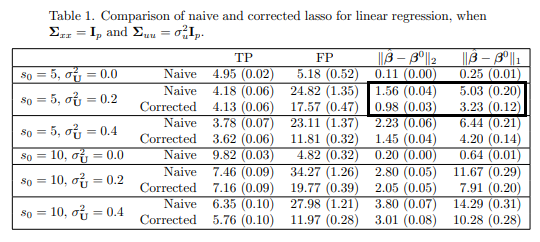

## Referências Principais

[1] SØRENSEN, Øystein; FRIGESSI, Arnoldo; THORESEN, Magne. Measurement error in LASSO: Impact and likelihood bias correction. Statistica sinica, p. 809-829, 2015.

[2] FRIEDMAN, Jerome; HASTIE, Trevor; TIBSHIRANI, Rob. Regularization paths for generalized linear models via coordinate descent. Journal of statistical software, v. 33, n. 1, p. 1, 2010. Disponível em: <https://www.jstatsoft.org/article/view/v033i01/v33i01.pdf>

[3] LOH, Po-Ling; WAINWRIGHT, Martin J. High-dimensional regression with noisy and missing data: Provable guarantees with non-convexity. Advances in neural information processing systems, v. 24, 2011.

[4] Gradiente Descentende. Método do Gradiente Descendente. Disponível em: <https://ml-cheatsheet.readthedocs.io/en/latest/gradient_descent.html>

